In [37]:
import matplotlib.pyplot as plt
import pandas as pd


df = pd.read_csv("Shoes_Data.csv")
df = df.drop_duplicates()
df = df[["reviews", "reviews_rating"]]

print(df.shape)
print(df.head(10))

(1015, 2)
                                             reviews  \
0  Not happy with product|| It's not as expected....   
1  Memory cushioning in these shoes is the best f...   
2  Worth to its amount|| Go for it|| Perfect|| 5 ...   
3  Sup quality|| Good but not expected|| Awesome 👌.!   
4  Best|| Satisfied!|| Affordable beauty 😘😘😘😘 the...   
5  Awesome|| Nice Product|| Nic fitting|| Poor qu...   
6  Bang for buck(paise)|| Refund or change|| This...   
7  Think twice before ordering Amazon|| Very poor...   
8  Material is good and comfortable. Nice product...   
9  It's nice and very comfortable.|| How can you ...   

                                      reviews_rating  
0  1.0 out of 5 stars|| 1.0 out of 5 stars|| 3.0 ...  
1  5.0 out of 5 stars|| 1.0 out of 5 stars|| 5.0 ...  
2  5.0 out of 5 stars|| 5.0 out of 5 stars|| 5.0 ...  
3  5.0 out of 5 stars|| 3.0 out of 5 stars|| 5.0 ...  
4  5.0 out of 5 stars|| 5.0 out of 5 stars|| 5.0 ...  
5  5.0 out of 5 stars|| 4.0 out of 5 stars|

In [38]:
reviews  = [review for raw_reviews in df["reviews"] for review in raw_reviews.split("||")]
ratings = [float(rating[:3]) for raw_ratings in df["reviews_rating"] for rating in raw_ratings.split("||")]
df = pd.DataFrame(list(zip(reviews, ratings)),
               columns =['review', 'rating'])

df.head(10)

,review,rating
0,Not happy with product,1.0
1,It's not as expected.,1.0
2,AVERAGE PRODUCT,3.0
3,Pic more beautiful,3.0
4,Got damage product. But quality is average fo...,3.0
5,Bad product different from what was listed,2.0
6,Worst product,1.0
7,Don't buy,2.0
8,Low quality makes pain on heals by sharp edge...,1.0
9,Do not buy it anyway,1.0


<AxesSubplot:ylabel='Frequency'>

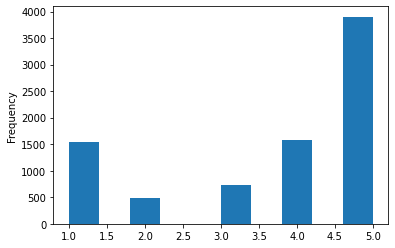

In [39]:
df['rating'].plot(kind='hist')

В отзывах куча мусора

In [40]:
print(set([symbol for review in df["review"].values for symbol in review]))


{"'", '🥾', 'र', '😡', 'ब', '👌', '💕', '💖', '🏃', '🌟', '💯', '👞', 'ॉ', '💥', '🏻', 'म', '👇', '🇪', '️', 'ள', '😉', '🤫', 'ि', '😘', '✌', 'l', '🏼', '😇', 'F', 'u', 'v', '।', '🦶', '…', 'G', '|', 'K', 'ट', '*', 'o', 'य', 'R', '😄', 'T', '☺', '😂', '&', 'a', '😁', ' ', 'z', '5', '’', '🤟', 'M', '»', '😭', 's', 'ி', 'i', 'W', '🤩', '்', 'ग', 'I', 'h', '3', '@', '❌', '🖤', 'Q', '🤮', '😍', 'U', 'L', 'J', 'E', 'O', '✊', '⇢', 'झ', '⭐', '🇳', '😔', '?', '😅', '%', '🤘', '😞', 't', 'C', 'w', 'S', 'P', '😊', 'न', 'b', 'Z', '💪', 'े', 'ख', 'ं', 'ू', '+', 'छ', '😟', '😀', 'A', 'ड', 'ा', '=', 'x', '🤨', '😐', 'த', 'ு', 'N', 'ह', '🤎', '\u200d', '7', '8', '❤', 'V', 'स', '👟', '🤑', 'H', 'ु', '🤙', 'X', 'ी', '😋', '!', 'g', '्', 'ப', 'f', '"', '6', '🇨', 'व', '☑', 'त', '💚', 'B', '(', '9', '«', 'ढ', '_', '✔', '❣', '/', '😎', '👍', 'c', 'q', '😃', '#', '0', '👎', '🔥', 'क', 'उ', '💰', 'ई', ':', 'ो', '😌', 'ß', 'd', '💋', 'द', '₹', '👏', '😶', 'प', '🥰', '😒', 'j', '-', '💸', 'p', 'ज', 'r', 'e', 'm', '🤣', '📦', '😤', '😢', '🌹', '😑', 'k', 'D', 'Y', 'च', 'ட',

Почистим

In [41]:
import re 
from string import punctuation
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stop = stopwords.words('english')
stop = set(stop)

def remove_punctuation(text):
    return text.translate(str.maketrans('','', punctuation))

def remove_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in stop])

def remove_digits(text):
    return re.sub(r'\d+', '', text)

def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

def remove_non_printable(text):
    text = text.encode("ascii", "ignore")
    return text.decode()
        
def clean_text(text):
    text = text.lower()
    text = remove_punctuation(text)
    text = remove_stopwords(text)
    text = remove_digits(text)
    text = remove_emoji(text)
    text = remove_non_printable(text)
    return text

df["review"] = df["review"].apply(clean_text)

[nltk_data] Downloading package stopwords to /Users/st/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Лемматизируем

In [42]:
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'[\w-]+')

from nltk.corpus import wordnet as wn
from nltk.stem.wordnet import WordNetLemmatizer
from nltk import pos_tag
from collections import defaultdict
tag_map = defaultdict(lambda : wn.NOUN)
tag_map['J'] = wn.ADJ
tag_map['V'] = wn.VERB
tag_map['R'] = wn.ADV

def lemmatize(line):
  tokens = tokenizer.tokenize(line)
  lemmas = []
  for token, tag in pos_tag(tokens):
      if len(token) > 1:
        lemma = lemmatizer.lemmatize(token.lower(), tag_map[tag[0]])
        if not re.search('[a-z]', token):
          lemmas.append(f'{lemma.upper()} {lemma}')
        else:
          lemmas.append(lemma)
  return ' '.join(lemmas)
  
df['review'] = [lemmatize(row) for row in df['review']]
df.head(10)

[nltk_data] Downloading package wordnet to /Users/st/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,review,rating
0,happy product,1.0
1,expect,1.0
2,average product,3.0
3,pic beautiful,3.0
4,got damage product quality average,3.0
5,bad product different list,2.0
6,bad product,1.0
7,dont buy,2.0
8,low quality make pain heals sharp edge inside ...,1.0
9,buy anyway,1.0
